In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [51]:
data = pd.read_csv("/Volumes/Bharat/Study/ml-100k/u.data",
sep='\t',names=('UserID','ItemID','Rating','Timestamp'))
# got the column names from read me file, u.data section
data.head()

,UserID,ItemID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


UNIVARIATE PLOT OF RATINGS

In [52]:
rating = data.copy()

In [53]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   UserID     100000 non-null  int64
 1   ItemID     100000 non-null  int64
 2   Rating     100000 non-null  int64
 3   Timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [54]:
rating.isnull().sum()

UserID       0
ItemID       0
Rating       0
Timestamp    0
dtype: int64

SO NO NULL VALUES

In [55]:
val = rating['Rating'].value_counts()
val

Rating
4    34174
3    27145
5    21201
2    11370
1     6110
Name: count, dtype: int64

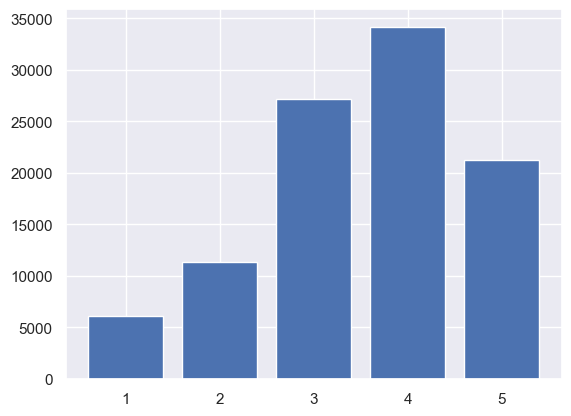

In [56]:
fig = plt.bar(x=val.index, height=val.values)

In [57]:
col_list = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
             'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
             'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [58]:
movies = pd.read_csv('/Volumes/Bharat/Study/ml-100k/u.item', sep='|', encoding='latin-1', names=col_list)

In [59]:
movies.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Childrens           1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [61]:
movies.isnull().sum()

movie id                 0
movie title              0
release date             1
video release date    1682
IMDb URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Childrens                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

In [62]:
movies_copy = movies.copy()

In [63]:
movies_copy.drop(columns=['video release date', 'IMDb URL'], inplace=True)

In [64]:
# looking at the counts of individual genres
l = []
for i in movies_copy.loc[:,'unknown' : 'Western'].columns:
    b = movies_copy[i].value_counts()[1]
    l.append(b)
print(l)
print(movies_copy.loc[:,'unknown' : 'Western'].columns)

[2, 251, 135, 42, 122, 505, 109, 50, 725, 22, 24, 92, 56, 61, 247, 101, 251, 71, 27]
Index(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')


In [65]:
movies_copy[movies_copy['unknown']==1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
266,267,unknown,NaN,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1372,1373,Good Morning (1971),4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#no information on movieid 267
rating[rating['ItemID']==267]

,UserID,ItemID,Rating,Timestamp
2172,130,267,5,875801239
3781,5,267,4,875635064
7245,268,267,3,875742077
12475,297,267,3,875409139
14756,319,267,4,875707690
15292,1,267,4,875692955
49295,532,267,3,875441348
93523,833,267,1,875655669
99723,422,267,4,875655986


In [67]:
rating.head()

,UserID,ItemID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [68]:
#As in unknown column there are only 2 entries and only 1 entry in ratings we can drop them.
movies_copy.drop(movies_copy[movies_copy['unknown'] == 1].index, axis=0, inplace=True)
movies_copy.drop(columns= 'unknown',inplace=True)

In [69]:
movies_copy.isna().apply(pd.value_counts)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
False,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680,...,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [70]:
print(movies_copy.shape)
movies_copy.head()

(1680, 21)


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [71]:
users = pd.read_csv('/Volumes/Bharat/Study/ml-100k/u.user', sep='|', names=['UserID',  'Age', 'Gender', 'Occupation','Zip-code'])

In [72]:
users.head()

,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [73]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      943 non-null    int64 
 1   Age         943 non-null    int64 
 2   Gender      943 non-null    object
 3   Occupation  943 non-null    object
 4   Zip-code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [74]:
users.isnull().apply(pd.value_counts)

,UserID,Age,Gender,Occupation,Zip-code
False,943,943,943,943,943


UNIVARIATE PLOT OF RATING, AGE, RELEASE DATE, GENDER, OCCUPATION

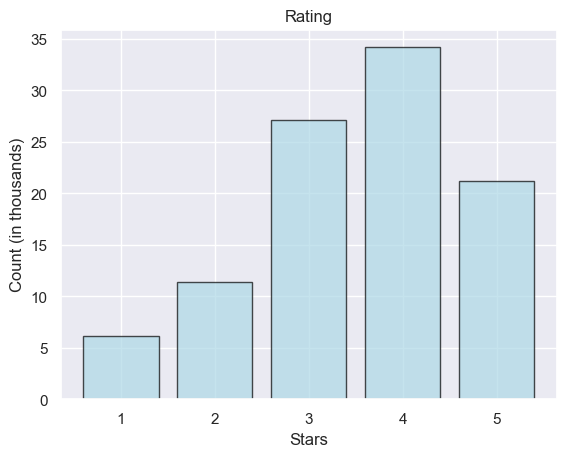

In [75]:
x = rating['Rating'].value_counts().index    #Values for x-axis
y = rating['Rating'].value_counts()/1000 #count(in thousands) on y-axis 


plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black', alpha = 0.7)  #plot a bar chart
plt.xlabel('Stars')
plt.ylabel('Count (in thousands)')
plt.title('Rating')

plt.show()


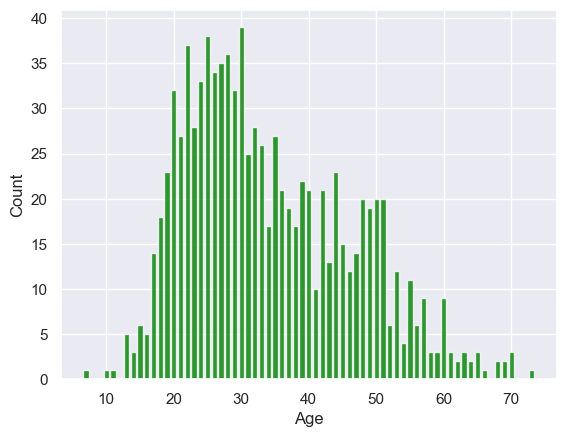

In [76]:
x = users['Age'].value_counts().index
y = users['Age'].value_counts().values

plt.bar(x,y, align='center', color='green', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

USING SEABORN

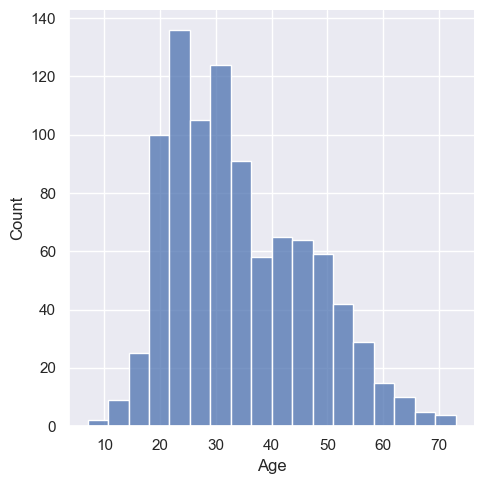

In [77]:
sns.set() #sets sns as default
sns.displot(users.Age) #used to visualise the distribution of data, Its skewed towards right, positively skewed
plt.show() #but the y axis is not accurate

In [78]:
users.head()

,UserID,Age,Gender,Occupation,Zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [79]:
rating.head()

,UserID,ItemID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [80]:
movies_copy.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


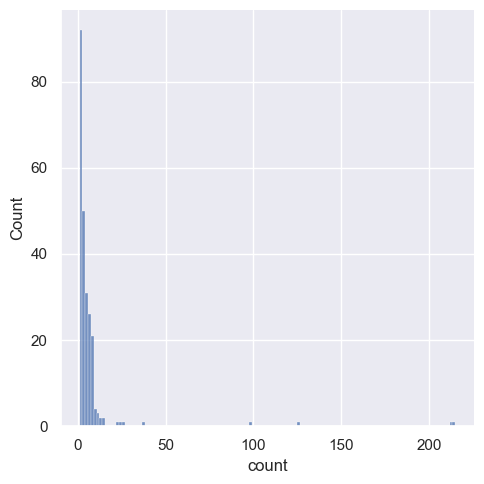

In [81]:
movies_copy['release date'].value_counts()

sns.displot(movies_copy['release date'].value_counts())
plt.show()

<Figure size 2000x600 with 0 Axes>

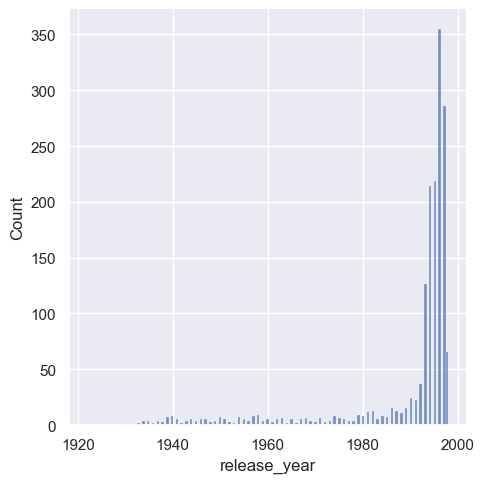

In [82]:
# Distribution of movies w.r.t release year
movies_copy['release_year'] = movies_copy['release date'].str.split('-', expand = True)[2]  #seperating out the year from the date
movies_copy['release_year'] = movies_copy.release_year.astype(int)  # changing the type to int
plt.figure(figsize=(20,6))    #increasing the figure size
sns.displot(movies_copy.release_year)
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

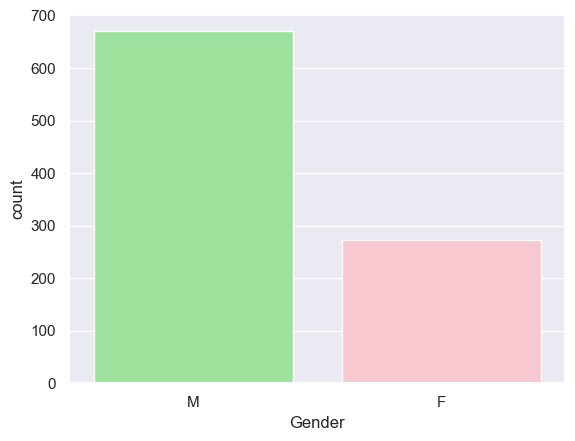

In [83]:
sns.countplot(users.Gender, x=users['Gender'], palette=['lightgreen','pink'])


In [84]:
users['Occupation'].value_counts()

Occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64

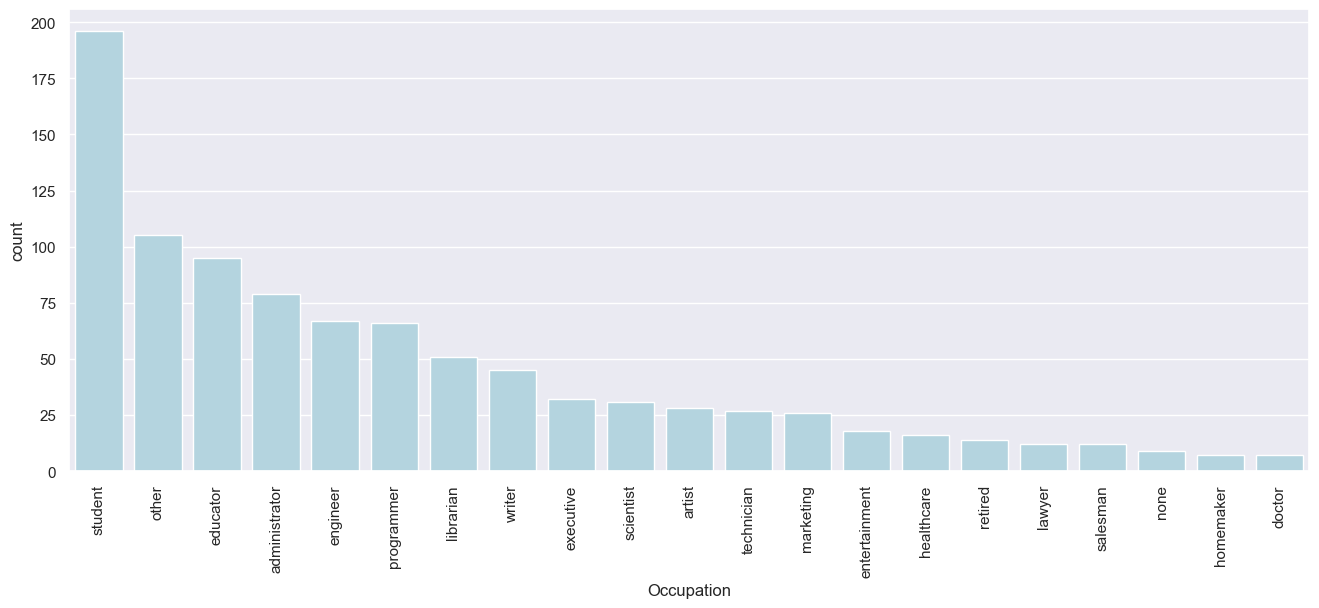

In [85]:
plt.figure(figsize=(16,6))

sns.countplot(users.Occupation, x=users['Occupation'], color='lightblue',order=users['Occupation'].value_counts().index)


plt.xticks(rotation=90)
plt.show()

VISUALISING POPULARITY OF GENRES OVER DIFFERENT YEARS

In [86]:
genre_by_year = movies_copy.groupby('release_year').sum()
genre_by_year

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,,
1922,675,"Nosferatu (Nosferatu, eine Symphonie des Graue...",01-Jan-1922,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1926,1542,"Scarlet Letter, The (1926)",01-Jan-1926,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1930,617,"Blue Angel, The (Blaue Engel, Der) (1930)",01-Jan-1930,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,656,M (1931),01-Jan-1931,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1932,1124,"Farewell to Arms, A (1932)",01-Jan-1932,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,"Postino, Il (1994)Crumb (1994)Nadja (1994)Cler...",01-Jan-199401-Jan-199401-Jan-199401-Jan-199401...,30,13,4,15,82,8,9,...,3,0,8,2,2,35,7,25,7,6
1995,183514,Toy Story (1995)GoldenEye (1995)Four Rooms (19...,01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...,40,22,6,21,63,11,5,...,3,1,14,3,5,37,15,39,5,2
1996,322295,Richard III (1995)Mr. Holland's Opus (1995)Fro...,22-Jan-199629-Jan-199605-Feb-199616-Feb-199616...,44,24,9,21,108,21,18,...,6,1,11,9,6,38,15,47,9,2


In [87]:
genre_by_year = genre_by_year.drop(columns='movie id').T #transpose of the array
#as we need plot by year

In [88]:
genre_by_year

release_year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
movie title,"Nosferatu (Nosferatu, eine Symphonie des Graue...","Scarlet Letter, The (1926)","Blue Angel, The (Blaue Engel, Der) (1930)",M (1931),"Farewell to Arms, A (1932)",Duck Soup (1933)Liebelei (1933),"Thin Man, The (1934)It Happened One Night (193...","39 Steps, The (1935)Bride of Frankenstein (193...",My Man Godfrey (1936)Little Lord Fauntleroy (1...,Snow White and the Seven Dwarfs (1937)Lost Hor...,...,"Weekend at Bernie's (1989)Abyss, The (1989)Hen...",Home Alone (1990)Dances with Wolves (1990)Good...,Terminator 2: Judgment Day (1991)Silence of th...,"Aladdin (1992)Lawnmower Man, The (1992)Reservo...",Three Colors: Blue (1993)What's Eating Gilbert...,"Postino, Il (1994)Crumb (1994)Nadja (1994)Cler...",Toy Story (1995)GoldenEye (1995)Four Rooms (19...,Richard III (1995)Mr. Holland's Opus (1995)Fro...,Fargo (1996)Return of the Jedi (1983)Kolya (19...,Apt Pupil (1998)Desperate Measures (1998)Wag t...
release date,01-Jan-1922,01-Jan-1926,01-Jan-1930,01-Jan-1931,01-Jan-1932,01-Jan-193301-Jan-1933,01-Jan-193401-Jan-193401-Jan-193401-Jan-1934,01-Jan-193501-Jan-193501-Jan-193501-Jan-1935,01-Jan-193601-Jan-1936,01-Jan-193701-Jan-193701-Jan-193701-Jan-1937,...,01-Jan-198901-Jan-198901-Jan-198901-Jan-198901...,01-Jan-199001-Jan-199001-Jan-199001-Jan-199001...,01-Jan-199101-Jan-199101-Jan-199101-Jan-199101...,01-Jan-199201-Jan-199201-Jan-199201-Jan-199201...,01-Jan-199301-Jan-199301-Jan-199301-Jan-199301...,01-Jan-199401-Jan-199401-Jan-199401-Jan-199401...,01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...,22-Jan-199629-Jan-199605-Feb-199616-Feb-199616...,14-Feb-199714-Mar-199724-Jan-199707-Mar-199714...,23-Oct-199830-Jan-199809-Jan-199830-Jan-199816...
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33


In [89]:
genre_by_year.dtypes

release_year
1922    object
1926    object
1930    object
1931    object
1932    object
         ...  
1994    object
1995    object
1996    object
1997    object
1998    object
Length: 71, dtype: object

In [90]:
plt.figure(figsize=(20,7))
#sns.heatmap(genre_by_year)
plt.show()

<Figure size 2000x700 with 0 Axes>

TOP 25 MOVIES BY AVERAGE RATING

In [91]:
rating.head()

,UserID,ItemID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [92]:
items = rating.groupby('ItemID').count()

items = items[items['Rating']> 100].index
items = rating.loc[rating.ItemID.isin(items)]
items = items.groupby('ItemID').mean()

items = items.sort_values('Rating',ascending = False)
order = items.index

In [93]:
items

,UserID,Rating,Timestamp
ItemID,,,
408,443.142857,4.491071,8.823304e+08
318,469.714765,4.466443,8.834050e+08
169,454.483051,4.466102,8.828888e+08
483,471.831276,4.456790,8.834745e+08
64,441.187279,4.445230,8.826119e+08
...,...,...,...
358,496.097902,2.615385,8.836746e+08
260,462.204724,2.574803,8.842682e+08
325,443.171875,2.546875,8.831109e+08


In [94]:
rating_list = items.Rating[:25]  #top 25 ratings

In [95]:
movies_copy.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


In [96]:
items = movies_copy.loc[movies_copy['movie id'].isin(order)]

In [97]:
top_25_movies = items.set_index('movie id').loc[order]

top_25_movies = top_25_movies.iloc[0:25, 0]

In [98]:
top_25_movies = top_25_movies.reset_index()
top_25_movies['avg_rating'] =  rating_list.values

In [99]:
top_25_movies

,ItemID,movie title,avg_rating
0,408,"Close Shave, A (1995)",4.491071
1,318,Schindler's List (1993),4.466443
2,169,"Wrong Trousers, The (1993)",4.466102
3,483,Casablanca (1942),4.456790
4,64,"Shawshank Redemption, The (1994)",4.445230
5,603,Rear Window (1954),4.387560
6,12,"Usual Suspects, The (1995)",4.385768
7,50,Star Wars (1977),4.358491
8,178,12 Angry Men (1957),4.344000
9,134,Citizen Kane (1941),4.292929


## See gender distribution accross different genres

Verify the following:
* Men watch more drama than women
* Men Watch more Romance than women
* Women watch more Sci-Fi than men

In [100]:
rating.columns

Index(['UserID', 'ItemID', 'Rating', 'Timestamp'], dtype='object')

In [101]:
movies_copy.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [102]:
users.columns

Index(['UserID', 'Age', 'Gender', 'Occupation', 'Zip-code'], dtype='object')

In [103]:
result = pd.merge(rating, users, how='inner', on='UserID')  #merging dataframes with UserID as the key

In [104]:
result

,UserID,ItemID,Rating,Timestamp,Age,Gender,Occupation,Zip-code
0,196,242,3,881250949,49,M,writer,55105
1,196,393,4,881251863,49,M,writer,55105
2,196,381,4,881251728,49,M,writer,55105
3,196,251,3,881251274,49,M,writer,55105
4,196,655,5,881251793,49,M,writer,55105
...,...,...,...,...,...,...,...,...
99995,941,919,5,875048887,20,M,student,97229
99996,941,273,3,875049038,20,M,student,97229
99997,941,1,5,875049144,20,M,student,97229
99998,941,294,4,875048532,20,M,student,97229


In [105]:
movies_copy.rename(columns= {'movie id' : 'ItemID'}, inplace= True)
#Renaming the column to have the same column name so that we can perform join operation

In [106]:
result = pd.merge(result, movies_copy, how='inner', on='ItemID')  # merging dataframes with ItemID as the key

In [107]:
result.head()

,UserID,ItemID,Rating,Timestamp,Age,Gender,Occupation,Zip-code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997


In [108]:
gender_wise_genres = result.groupby('Gender').sum().loc[:,'Action':'Western']

In [109]:
gender_wise_genres

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Gender,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [110]:
gender_wise_genres['Total'] = gender_wise_genres.sum(axis=1)

In [111]:
gender_wise_genres

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
Gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [112]:
gender_wise_genres.div(gender_wise_genres.Total, axis=0)*100

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
Gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


* Just above 20% women watched drama and just above 18% men watched drama. So more women than men watch drama movies
* Almost 11% women watch Romance and only 8.5% men watch Romance. So Women watch more romance than men. 
* More Men watch Sci-Fi than Women (6.3% and 4.9% respectively)